In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd
import random
style.use('ggplot')

In [2]:
df = pd.read_csv('data.csv')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,label
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 4:[]} #2 & 4 is output data
test_set = {2:[], 4:[]}  #2 is for the benign tumors   4 is for malignant tumors,

train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]


In [6]:
for i in train_data:  
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])
  

In [7]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    #print(distances)
    #print(sorted(distances))
    #print(sorted(distances)[:k])
    votes = [i[1] for i in sorted(distances)[:k]]
    #print(Counter(votes))
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result   # 2,4

/Users/eobard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: K is set to a value less than total voting groups!
  This is separate from the ipykernel package so we can avoid doing imports until


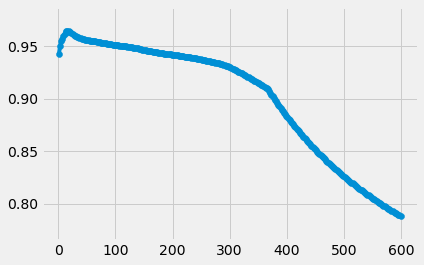

In [47]:
correct = 0
total=0
accuracy=[]
m=[]
for k in range(1,600,2):
    m.append(k)
    for group in test_set:
        for data in test_set[group]:
            vote = k_nearest_neighbors(train_set, data, k)
            if group == vote: 
                correct += 1
            total += 1
    acc=correct/total
    accuracy.append(acc)
#print(accuracy)
plt.scatter(m,accuracy) 
plt.plot(m,accuracy)

plt.show()




In [29]:
print(max(accuracy))

0.9640287769784173


In [35]:
j = accuracy.index(max(accuracy))
print (j)

6


In [37]:
accuracy[6]

0.9640287769784173

In [39]:
accuracy[accuracy.index(max(accuracy))]

0.9640287769784173

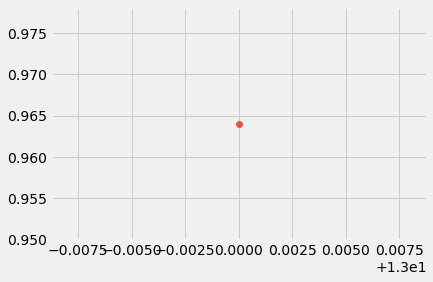

In [46]:
plt.scatter(m[accuracy.index(max(accuracy))], max(accuracy))
plt.show()